In [1]:
# For development purposes, reload imported modules when source changes
%load_ext autoreload
%autoreload 2

import spikeextractors as si
import spikewidgets as sw
import os, sys
import numpy as np

from mountainlab_pytools import mlproc as mlp
from mountainlab_pytools import mdaio

from gen_synth_datasets import gen_synth_datasets

import h5py
import json
from matplotlib import pyplot as plt

In [2]:
#templates='kbucket://b5ecdf1474c5/MEArec/templates/templates_30_Neuronexus-32.h5'
templates='kbucket://b5ecdf1474c5/MEArec/templates/templates_30_tetrode_mea.h5'
num_datasets=10
v_K = [10, 20] # list (vector: "v_") of K
v_noise = [10, 20]
v_nChans = [4]

#output 
v_outputdir = [] # stores name of recordingset containing multiple recordings 
v_datasets = []

ds0=dict(
    duration=600,
    noise_level=10,
    templates=templates,
    f_exc=2, f_inh=7,
    min_rate=0.5,
    st_exc=1, st_inh=3,
    channel_ids=None
)
# datasets_noise10_K20_C8
for noise in v_noise:
    for K in v_K:
        for nChans in v_nChans:
            outputdir1 = '~/datasets_noise{}_K{}_C{}'.format(noise, K, nChans)
            v_outputdir.append(outputdir1)
            datasets = []
            for iDataset in range(1,num_datasets+1):
                ds=dict(        
                    name = '{}_synth'.format('{0:03d}'.format(iDataset)),
                    seed = iDataset,
                    n_exc = int(K/2), n_inh=K-int(K/2),
                )
                for key in ds0:
                    ds[key]=ds0[key]
                datasets.append(ds)
            v_datasets.append(datasets)
    
#print('DATASETS:')
#for ds in datasets:
#    print(ds['name'])

In [3]:
print(v_outputdir)

['datasets_noise10_K10_C4', 'datasets_noise10_K20_C4', 'datasets_noise20_K10_C4', 'datasets_noise20_K20_C4']


In [4]:
for datasets, outputdir in zip(v_datasets, v_outputdir):
    gen_synth_datasets(datasets,outdir=outputdir,samplerate=30000)

001_synth


/home/jamesjun/conda/envs/spikes2/lib/python3.6/site-packages/quantities-0.12.2-py3.6.egg/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide
/home/jamesjun/conda/envs/spikes2/lib/python3.6/site-packages/scipy/signal/signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]


002_synth
003_synth
004_synth
005_synth
006_synth
007_synth
008_synth
009_synth
010_synth
Done.
001_synth
002_synth
003_synth
004_synth
005_synth
006_synth
007_synth
008_synth
009_synth
010_synth
Done.
001_synth
002_synth
003_synth
004_synth
005_synth
006_synth
007_synth
008_synth
009_synth
010_synth
Done.
001_synth
002_synth
003_synth
004_synth
005_synth
006_synth
007_synth
008_synth
009_synth
010_synth
Done.


In [7]:
IX=si.MdaRecordingExtractor(dataset_directory='datasets_noise20_K10_C4/001_synth')
OX=si.MdaSortingExtractor(firings_file='datasets_noise10_K10_C4/001_synth/firings_true.mda')

In [8]:
sw.TimeseriesWidget(recording=IX).display()

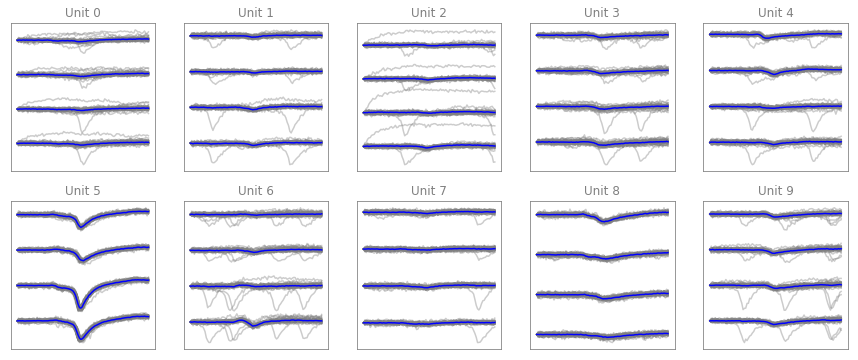

In [20]:
sw.UnitWaveformsWidget(recording=IX, sorting=OX, snippet_len=100,height=10).plot()